# Sinusoidal Regression using Tensorflow - Ganesh Ram Gururajan

## Importing Packages

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
np.random.seed(101)
tf.set_random_seed(101)

## Defining x and y data

In [4]:
x = np.linspace(5,25,100) #Taking 100 points between 5(inclusive) and 25(exclusive)
y = np.sin(x) #Defining Y as sin(x)

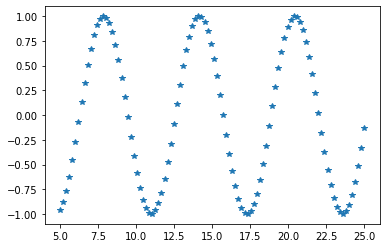

In [5]:
plt.plot(x,y,'*')

## Addition of noise

In [6]:
x += np.random.uniform(-0.25,0.25,len(x))
y += np.random.uniform(-0.25,0.25,len(x))

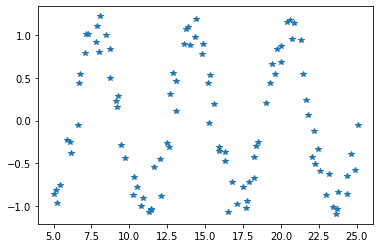

In [7]:
plt.plot(x,y,'*')

## Placeholders and Variables Definition

In [8]:
X = tf.placeholder('float')
Y = tf.placeholder('float')

In [9]:
c = tf.Variable(0.1) #Assigning Random decimal to the variable

## Defining Model

In [10]:
y_model = tf.sin(tf.add(X , c)) #Sine Model

## Mean Squared Error

In [11]:
error = tf.reduce_sum(tf.square(y_model-Y)) / len(x) #Mean Squared Error

## Gradient Descent Optimizer

In [12]:
optim = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(error) #Gradient Descent

## Running Tensorflow Session

In [13]:
init = tf.global_variables_initializer() #Global Variabel Initializer

In [14]:
with tf.Session() as sess: #Session
    sess.run(init)
    
    for epochs in range(100): #100 epochs
        
        for (xs,ys) in zip(x,y):
            sess.run(optim, feed_dict = {X:xs,Y:ys})
    
    error_cost = sess.run(error, feed_dict = {X:x,Y:y})
    C = sess.run(c)

In [15]:
error_cost #Minimum Error

0.031284012

In [16]:
C #Value of C in the equation

0.03332769

In [17]:
pred = np.sin(x - C) #Creating Numpy array of the prediction

## Visualizing Predicted Curve

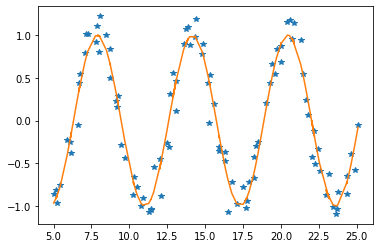

In [19]:
plt.plot(x,y,'*') #Plotting original Data
plt.plot(x,pred) #Plotting predicted Sine

# Thank You